## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview

complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(complete_data["Mouse ID"].unique())

print(total_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data.loc[complete_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_complete_data=complete_data.loc[complete_data ["Mouse ID"]!= "g989"]

cleaned_complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
check = len(cleaned_complete_data["Mouse ID"].unique())
print(check)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Variance = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
StdDev = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
StdErr = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary dataframe.
Summary_data = pd.DataFrame({ "Mean Tumor Volume": Mean,
                               "Median Tumor Volume": Median,
                               "Tumor Volume Variance": Variance,
                               "Tumor Volume Std. Dev.":StdDev, 
                               "Tumor Volume Std. Err.":StdErr                              
                             })
Summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
new_summary_statistic = cleaned_complete_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

new_summary_statistic

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
%matplotlib inline 


In [11]:
mice_data = cleaned_complete_data["Drug Regimen"].value_counts()

mice_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice Tested per Treatment')

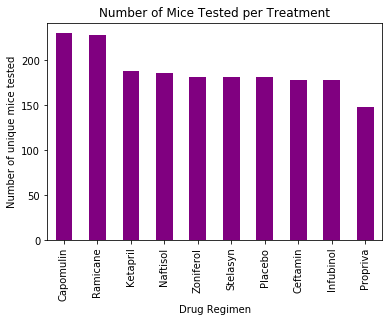

In [12]:
plot_pandas= mice_data.plot(kind = "bar", color = 'purple')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of unique mice tested')
plt.title("Number of Mice Tested per Treatment")

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = mice_data.index.values
micefigures = mice_data.values

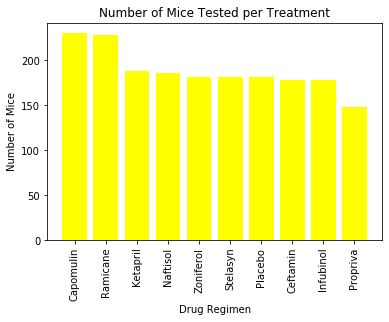

In [14]:
x_axis = np.arange(0,len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, micefigures, facecolor="yellow", alpha=1, align="center")
plt.xticks(tick_locations, drugs, rotation = "vertical")
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender =  cleaned_complete_data["Sex"].value_counts()
gender 

Male      958
Female    922
Name: Sex, dtype: int64

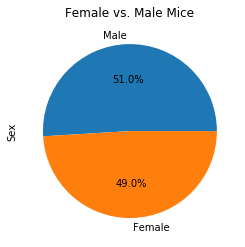

In [17]:
gender.plot(kind='pie', y='Sex', startangle = 360, autopct ='%1.1f%%' )
plt.title("Female vs. Male Mice")
plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [958, 922]


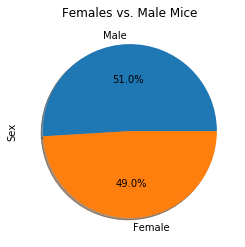

In [19]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=360)
plt.title("Females vs. Male Mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Capomulin", :]
Ramicane_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Ramicane", :]
Infubinol_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Ceftamin", :]

In [21]:
# Start by getting the last (greatest) timepoint for each mouse
LastTimepoint_Campomulin = Capomulin_table.groupby("Mouse ID")["Timepoint"].max()
Lasttimepoint_Ramicane = Ramicane_table.groupby("Mouse ID")["Timepoint"].max()
Lasttimepoint_Infubinol = Infubinol_table.groupby("Mouse ID")["Timepoint"].max()
Lasttimepoint_Ceftamin = Ceftamin_table.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_campomulin = pd.merge( LastTimepoint_Campomulin,cleaned_complete_data,on=("Mouse ID","Timepoint"), how= "left")
merged_Ramicane = pd.merge(Lasttimepoint_Ramicane,cleaned_complete_data,on=("Mouse ID","Timepoint"), how= "left")
merged_Infubinol = pd.merge(Lasttimepoint_Infubinol,cleaned_complete_data,on=("Mouse ID","Timepoint"), how= "left")
merged_Ceftamin = pd.merge(Lasttimepoint_Ceftamin,cleaned_complete_data,on=("Mouse ID","Timepoint"), how= "left")

In [22]:
total_drugs = pd.concat([merged_campomulin,merged_Ramicane, merged_Infubinol,merged_Ceftamin],ignore_index=True)
total_drugs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_list = []

treatment = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    print(f"{drug}'s Quartiles, Median and Outliers")
    print(f"******************************************")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalvolumeforeachdrug = total_drugs.loc[total_drugs["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    vol_list.append(finalvolumeforeachdrug)
    
    # add subset 
    quartiles = finalvolumeforeachdrug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
    if treatment == 0:
    
        print(f"The lower quartile of {drug} is: {round(lowerq, 2)}")
        print(f"The upper quartile of {drug} is: {round(upperq, 2)}")
        print(f"The interquartile range of {drug} is: {round(iqr, 2)}")
        print(f"The median of {drug} drug is: {round(quartiles[0.5], 2)} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliersifany = finalvolumeforeachdrug.loc[(finalvolumeforeachdrug < lower_bound) | (finalvolumeforeachdrug >  upper_bound)]

    print(f"Values below {round(lower_bound, 2)} could be outliers.")
    print(f"Values above {round(upper_bound, 2)} could be outliers.")
    print(f"{drug}'s potential ouliers: {outliersifany}")
    print(f"----------------------------------------------------------------------------------------")

treatment = treatment + 1   

Capomulin's Quartiles, Median and Outliers
******************************************
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin drug is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Capomulin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------------------------------------
Ramicane's Quartiles, Median and Outliers
******************************************
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane drug is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Ramicane's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------------------------------------------

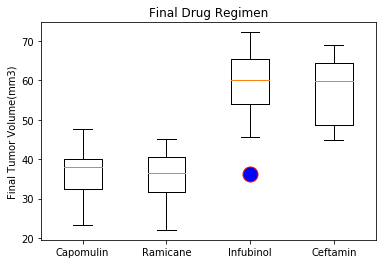

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [vol_list[0],vol_list[1], vol_list[2], vol_list[3]]
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Drug Regimen')
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(data,flierprops = dict(marker='o', markerfacecolor='b', markersize=15,
                   linestyle='none', markeredgecolor='r'), labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Campomulinonj246 = Capomulin_table.loc[(Capomulin_table["Mouse ID"]== "j246")]
Campomulinonj246

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
226,j246,0,45.000000,0,Capomulin,Female,21,21
451,j246,5,45.641438,0,Capomulin,Female,21,21
704,j246,10,46.408361,0,Capomulin,Female,21,21
791,j246,15,43.312654,0,Capomulin,Female,21,21
1020,j246,20,44.020370,0,Capomulin,Female,21,21
1276,j246,25,44.555226,0,Capomulin,Female,21,21
1354,j246,30,38.044082,1,Capomulin,Female,21,21
1497,j246,35,38.753265,1,Capomulin,Female,21,21


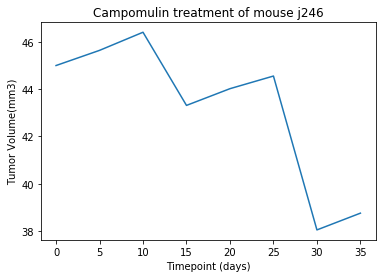

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Campomulin treatment of mouse j246")
x_axis = Campomulinonj246["Timepoint"]
y_axis = Campomulinonj246["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_campomulin_vol = Capomulin_table.groupby("Mouse ID").mean()
avg_campomulin_vol

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [29]:
correlation = st.pearsonr(avg_campomulin_vol["Weight (g)"],avg_campomulin_vol["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


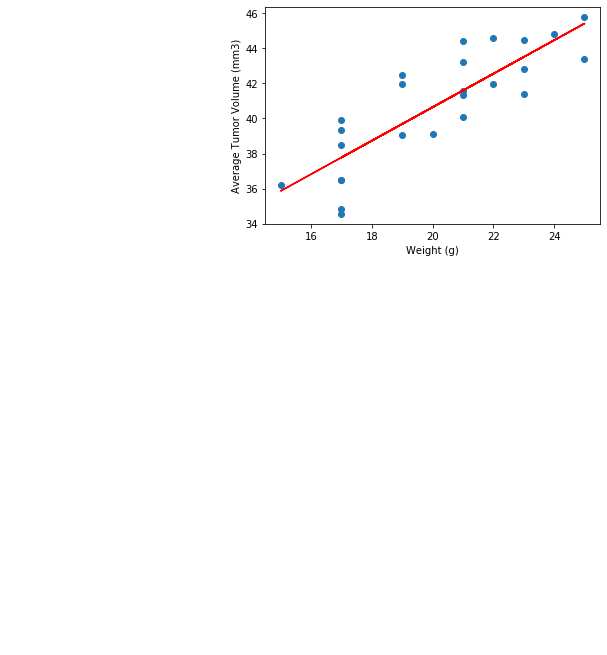

In [30]:
x_values = avg_campomulin_vol["Weight (g)"]
y_values = avg_campomulin_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="yellow")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()